#### Final Project: Rick & Morty analysis

# Phase 2: Build the graph

In [31]:
# imports
import pandas as pd
import ast
import networkx as nx
import matplotlib.pyplot as plt

## Download previous files

In [3]:
df_characters = pd.read_csv("RaM_characters_wRelations.csv")

In [6]:
def add_node(row, aGraph):
    """ Add the node given in row to global network """
    aGraph.add_node(row.Name)

def add_edges(row, aGraph):
    """ Add all edges which concern given character in row"""
    char_name = row.Name
    char_relations = ast.literal_eval(row.Relations)
    for aTargetRelation in char_relations:
        aGraph.add_edge(char_name,aTargetRelation)

In [7]:
# Create the associate graph with all attributes : role, race, genre, contentLength
G = nx.DiGraph()
_ = df_characters.apply(add_node, args=(G,), axis=1)
_ = df_characters.apply(add_edges, args=(G,), axis=1)

# Extract the Giant Connected Component, GCC
GCC = nx.weakly_connected_components(G)
GCC = list(GCC)
GCC.sort(key=len)
concerned_nodes = GCC[-1]

GCC = G.subgraph(concerned_nodes).copy()

# make G undirected
GU = G.to_undirected()

In [25]:
G.number_of_nodes()

547

In [28]:
G.number_of_edges()

2010

In [15]:
# store in and out degree
df_characters['in_degree'] = df_characters['Name'].map(dict(G.in_degree))
df_characters['out_degree'] = df_characters['Name'].map(dict(G.out_degree))

(array([541.,   1.,   2.,   1.,   0.,   0.,   0.,   0.,   1.,   1.]),
 array([  0. ,  27.2,  54.4,  81.6, 108.8, 136. , 163.2, 190.4, 217.6,
        244.8, 272. ]),
 <BarContainer object of 10 artists>)

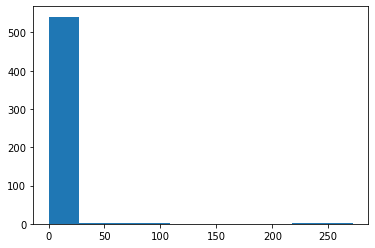

In [33]:
plt.hist(df_characters['in_degree'])

In [35]:
df_characters['in_degree'].describe()

count    547.000000
mean       3.674589
std       16.684098
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max      272.000000
Name: in_degree, dtype: float64

(array([335., 165.,  26.,  13.,   2.,   1.,   2.,   1.,   0.,   2.]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.]),
 <BarContainer object of 10 artists>)

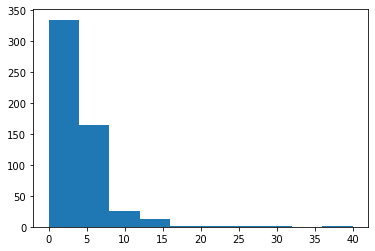

In [34]:
plt.hist(df_characters['out_degree'])

In [36]:
df_characters['out_degree'].describe()

count    547.000000
mean       3.674589
std        4.031487
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max       40.000000
Name: out_degree, dtype: float64

In [22]:
df_characters.sort_values('in_degree',ascending=False)[['Name','out_degree','in_degree']].head(10)

,Name,out_degree,in_degree
387,Rick Sanchez,40,272
304,Morty Smith,36,240
546,Jerry Smith,26,85
466,Summer Smith,30,73
42,Beth Smith,25,64
140,Evil Morty,8,29
87,Council of Ricks,14,27
479,Tammy Guterman,11,26
53,Birdperson,8,24
192,Gromflomites,7,23


In [23]:
df_characters.sort_values('out_degree',ascending=False)[['Name','out_degree','in_degree']].head(10)

,Name,out_degree,in_degree
387,Rick Sanchez,40,272
304,Morty Smith,36,240
466,Summer Smith,30,73
546,Jerry Smith,26,85
42,Beth Smith,25,64
291,Memory Parasites,20,16
469,Summer Smith (Cronenberged dimension),19,10
204,Hemorrhage,18,16
232,Jerry Smith (Cronenberged dimension),15,16
302,Morty Jr.,15,18
